In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
cd '/content/gdrive/My Drive/Colab/code2vec'

/content/gdrive/My Drive/Colab/code2vec


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import tensorflow as tf; print(tf.__version__)

1.15.0


In [0]:
!source preprocess.sh

Extracting paths from validation set...
Finished extracting paths from validation set
Extracting paths from test set...
Finished extracting paths from test set
Extracting paths from training set...
Finished extracting paths from training set
Creating histograms from the training data
File: my_dataset.test.raw.txt
Average total contexts: 646.7284440039643
Average final (after sampling) contexts: 154.4400396432111
Total methods/examples: 1009
Empty methods/examples: 0
Max number of contexts per target: 15990
Min number of contexts per target: 3
Methods/examples with at least one full found context: 612
Methods/examples with # full found contexts > max_contexts: 516
Methods/examples with # full found contexts < max_contexts: 493
File: my_dataset.val.raw.txt
Average total contexts: 374.07248545303406
Average final (after sampling) contexts: 171.73233582709892
Total methods/examples: 6015
Empty methods/examples: 0
Max number of contexts per target: 12590
Min number of contexts per target: 3

In [0]:
!source train_tf.sh


2019-12-10 03:01:56.968161: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-10 03:01:57.040568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-10 03:01:57.041165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P4 major: 6 minor: 1 memoryClockRate(GHz): 1.1135
pciBusID: 0000:00:04.0
2019-12-10 03:01:57.061567: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-12-10 03:01:57.276241: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2019-12-10 03:01:57.399091: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
20

In [0]:
with open('train_log.txt','r') as file:
  train_log = file.read()
precision = []
recall = []
f1 = []
for line in train_log.split('\n'):
  l = line.split()
  if (len(l) > 0) and (l[0] == 'After'):
    precision.append(float(l[4].strip(',')))
    recall.append(float(l[6].strip(',')))
    f1.append(float(l[-1]))
  

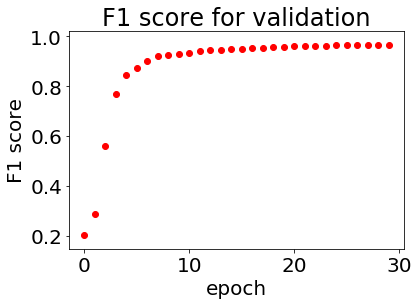

(0.9667330530353324, 29)

In [0]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(15,8))
# plt.scatter(range(101),precision, c='y')
# plt.scatter(range(101), recall, c ='b')
plt.scatter(range(30), f1[0:30], c='r')
plt.title('F1 score for validation')
plt.xlabel('epoch')
plt.ylabel('F1 score')
plt.show()
max(f1[0:30]), f1[0:30].index(max(f1[0:30]))

In [0]:
!python3 code2vec.py --load models/test2vec/saved_model --test data/my_dataset/my_dataset.test.c2v --export_code_vectors


2019-12-09 23:17:20.179331: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-09 23:17:20.192354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-09 23:17:20.192907: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-12-09 23:17:20.193138: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-12-09 23:17:20.199378: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2019-12-09 23:17:20.201105: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcu

In [0]:
!python3 code2vec.py --load models/test2vec/saved_model --test data/my_dataset/my_dataset.val.c2v --export_code_vectors


2019-12-09 23:17:37.715582: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-09 23:17:37.727763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-09 23:17:37.728314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-12-09 23:17:37.728550: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-12-09 23:17:37.730138: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2019-12-09 23:17:37.731728: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcu

In [0]:
with open('data_part1/my_dataset/my_dataset.NumberUtils.c2v.vectors','r') as ff:     # NumberUtils
  testFail = ff.read().split('\n')
with open('data_part1/my_dataset/my_dataset.StrSubstitutor.c2v.vectors','r') as fp:  # StrSubstitutor
  testPass0 = fp.read().split('\n')
with open('data_part2/my_dataset/my_dataset.test.c2v.vectors','r') as ff: # SerializationUtils
  testPass1 = ff.read().split('\n')
with open('data_part2/my_dataset/my_dataset.val.c2v.vectors','r') as fp:  # ToStringBuilder
  testPass2 = fp.read().split('\n')

In [0]:
# only remove ''
testFail.pop(-1), testPass0.pop(-1), testPass1.pop(-1), testPass2.pop(-1)

('', '', '', '')

In [0]:
len(testFail),len(testPass0),len(testPass1),len(testPass2)

(36, 20, 12, 46)

0.8249462954135586
[0.89129908 0.87798979 0.87799844 0.89719851 0.87838609 0.87880659
 0.90024872 0.87805296 0.8781688  0.8973391  0.87807797 0.87816858
 0.89517349 0.8780756  0.87818325 0.89587444 0.89073452 0.88785172
 0.88321631 0.88750598 0.89623936 0.89397461 0.89228782 0.89079634
 0.88855315 0.88948879 0.89362398 0.89380278 0.33438976 0.49383802
 0.89204066 0.75166904 0.21108896 0.45083329 0.84774518 0.86934495]
[0.21108895598208394, 0.33438976303023665, 0.45083329478297274, 0.4938380224649647, 0.751669041169357, 0.8477451794322742, 0.8693449495060841, 0.8779897928240785, 0.8779984364888734, 0.8780529574375049, 0.878075604232254, 0.8780779726643044, 0.8781685760212539, 0.8781688044382978, 0.8781832475179183, 0.8783860927807923, 0.8788065857244658, 0.8832163108983483, 0.8875059819617441, 0.8878517180233584, 0.8885531522166814, 0.8894887865910994, 0.8907345198772796, 0.8907963389736716, 0.8912990845261182, 0.8920406631592532, 0.8922878200865567, 0.8936239798375628, 0.89380278484742

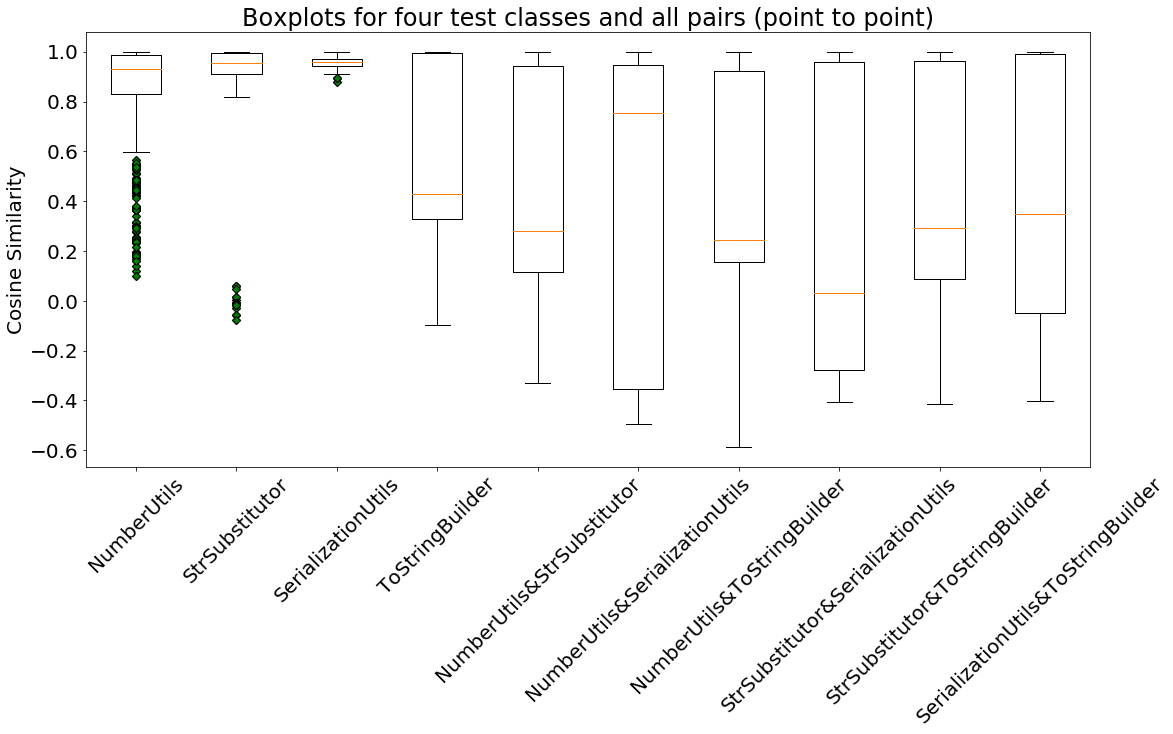

In [0]:
# have removed ''
flist = []
for i in testFail:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  flist.append(list2)

plist0 = []
for i in testPass0:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist0.append(list2)

plist1 = []
for i in testPass1:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist1.append(list2)

plist2 = []
for i in testPass2:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist2.append(list2)


import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

dist_outf = 1-pairwise_distances(flist, metric="cosine")
print(dist_outf.sum()/len(flist)**2)   # similarity
print(dist_outf.sum(axis=0)/len(flist))  # similarity for each test case
print(sorted(dist_outf.sum(axis=0)/len(flist)))
print('\n')

dist_out0 = 1-pairwise_distances(plist0, metric="cosine")
print(dist_out0.sum()/len(plist0)**2)
print(dist_out0.sum(axis=0)/len(plist0))  # similarity for each test case
print(sorted(dist_out0.sum(axis=0)/len(plist0)))
print('\n')

dist_out1 = 1-pairwise_distances(plist1, metric="cosine")
print(dist_out1.sum()/len(plist1)**2)
print(dist_out1.sum(axis=0)/len(plist1))  # similarity for each test case
print(sorted(dist_out1.sum(axis=0)/len(plist1)))
print('\n')

dist_out2 = 1-pairwise_distances(plist2, metric="cosine")
print(dist_out2.sum()/len(plist2)**2)
print(dist_out2.sum(axis=0)/len(plist2))  # similarity for each test case
print(sorted(dist_out2.sum(axis=0)/len(plist2)))
print('\n')

dist_outf0 = 1-pairwise_distances(flist+plist0, metric="cosine")
print(dist_outf0.sum()/len(flist+plist0)**2)   # similarity
print(dist_outf0.sum(axis=0)/len(flist+plist0))  # similarity for each test case
print(sorted(dist_outf0.sum(axis=0)/len(flist+plist0)))
print('\n')

dist_outf1 = 1-pairwise_distances(flist+plist1, metric="cosine")
print(dist_outf1.sum()/len(flist+plist1)**2)   # similarity
print(dist_outf1.sum(axis=0)/len(flist+plist1))  # similarity for each test case
print(sorted(dist_outf1.sum(axis=0)/len(flist+plist1)))
print('\n')

dist_outf2 = 1-pairwise_distances(flist+plist2, metric="cosine")
print(dist_outf2.sum()/len(flist+plist2)**2)   # similarity
print(dist_outf2.sum(axis=0)/len(flist+plist2))  # similarity for each test case
print(sorted(dist_outf2.sum(axis=0)/len(flist+plist2)))
print('\n')

dist_out01 = 1-pairwise_distances(plist0+plist1, metric="cosine")
print(dist_out01.sum()/len(plist0+plist1)**2)   # similarity
print(dist_out01.sum(axis=0)/len(plist0+plist1))  # similarity for each test case
print(sorted(dist_out01.sum(axis=0)/len(plist0+plist1)))
print('\n')

dist_out02 = 1-pairwise_distances(plist0+plist2, metric="cosine")
print(dist_out02.sum()/len(plist0+plist2)**2)   # similarity
print(dist_out02.sum(axis=0)/len(plist0+plist2))  # similarity for each test case
print(sorted(dist_out02.sum(axis=0)/len(plist0+plist2)))
print('\n')

dist_out12 = 1-pairwise_distances(plist2+plist1, metric="cosine")
print(dist_out12.sum()/len(plist2+plist1)**2)   # similarity
print(dist_out12.sum(axis=0)/len(plist2+plist1))  # similarity for each test case
print(sorted(dist_out12.sum(axis=0)/len(plist2+plist1)))
print('\n')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
data = [dist_outf, dist_out0, dist_out1, dist_out2, dist_outf0, dist_outf1, dist_outf2, dist_out01, dist_out02, dist_out12]
fig, ax = plt.subplots(figsize=(18,8))
green_diamond = dict(markerfacecolor='g', marker='D')
ax.set_title('Boxplots for four test classes and all pairs (point to point)')
ax.boxplot(data, flierprops=green_diamond)
ax.set_xticklabels(['NumberUtils', 'StrSubstitutor', 'SerializationUtils','ToStringBuilder', 'NumberUtils&StrSubstitutor', 'NumberUtils&SerializationUtils', 'NumberUtils&ToStringBuilder', 'StrSubstitutor&SerializationUtils', 'StrSubstitutor&ToStringBuilder', 'SerializationUtils&ToStringBuilder'], rotation=45)
ax.set_ylabel('Cosine Similarity')
plt.show()


0.8249462954135586
[0.89129908 0.87798979 0.87799844 0.89719851 0.87838609 0.87880659
 0.90024872 0.87805296 0.8781688  0.8973391  0.87807797 0.87816858
 0.89517349 0.8780756  0.87818325 0.89587444 0.89073452 0.88785172
 0.88321631 0.88750598 0.89623936 0.89397461 0.89228782 0.89079634
 0.88855315 0.88948879 0.89362398 0.89380278 0.33438976 0.49383802
 0.89204066 0.75166904 0.21108896 0.45083329 0.84774518 0.86934495]
[0.21108895598208394, 0.33438976303023665, 0.45083329478297274, 0.4938380224649647, 0.751669041169357, 0.8477451794322742, 0.8693449495060841, 0.8779897928240785, 0.8779984364888734, 0.8780529574375049, 0.878075604232254, 0.8780779726643044, 0.8781685760212539, 0.8781688044382978, 0.8781832475179183, 0.8783860927807923, 0.8788065857244658, 0.8832163108983483, 0.8875059819617441, 0.8878517180233584, 0.8885531522166814, 0.8894887865910994, 0.8907345198772796, 0.8907963389736716, 0.8912990845261182, 0.8920406631592532, 0.8922878200865567, 0.8936239798375628, 0.89380278484742

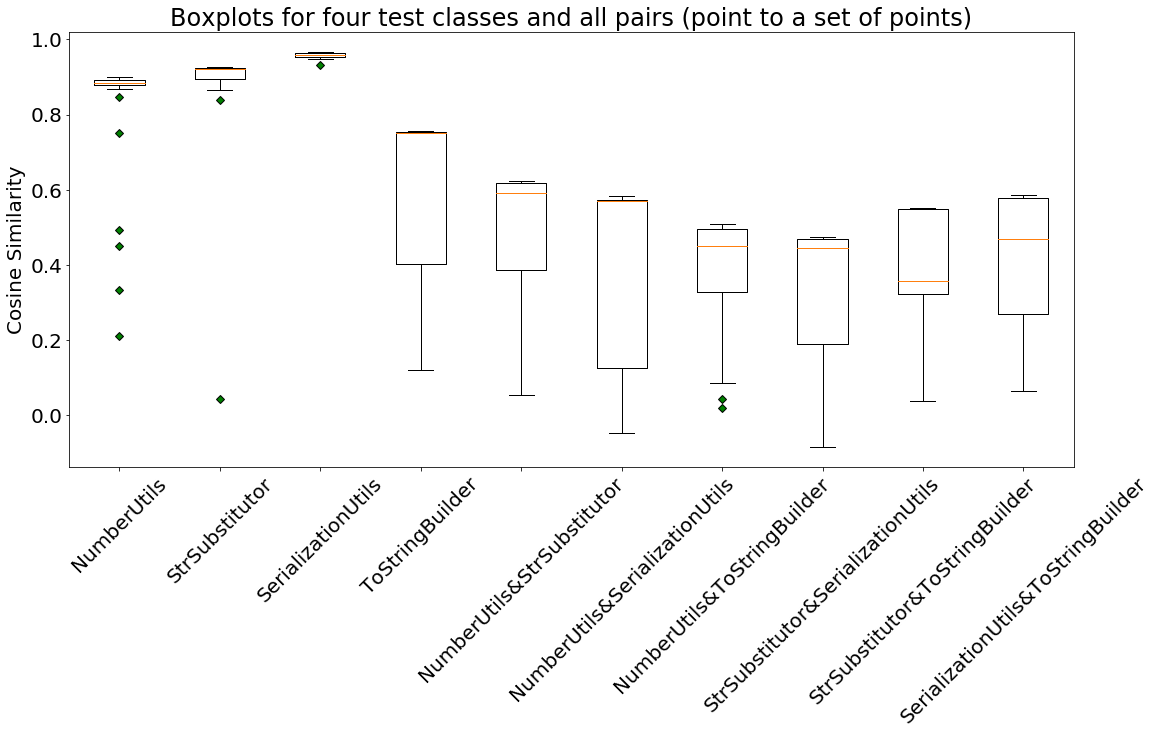

In [0]:
# have removed '' and calculate similarity from one point to the other points
flist = []
for i in testFail:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  flist.append(list2)

plist0 = []
for i in testPass0:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist0.append(list2)

plist1 = []
for i in testPass1:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist1.append(list2)

plist2 = []
for i in testPass2:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist2.append(list2)


import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

dist_outf = 1-pairwise_distances(flist, metric="cosine")
print(dist_outf.sum()/len(flist)**2)   # similarity
print(dist_outf.sum(axis=0)/len(flist))  # similarity for each test case
print(sorted(dist_outf.sum(axis=0)/len(flist)))
dist_outf = dist_outf.sum(axis=0)/len(flist)
print('\n')

dist_out0 = 1-pairwise_distances(plist0, metric="cosine")
print(dist_out0.sum()/len(plist0)**2)
print(dist_out0.sum(axis=0)/len(plist0))  # similarity for each test case
print(sorted(dist_out0.sum(axis=0)/len(plist0)))
dist_out0 = dist_out0.sum(axis=0)/len(plist0)
print('\n')

dist_out1 = 1-pairwise_distances(plist1, metric="cosine")
print(dist_out1.sum()/len(plist1)**2)
print(dist_out1.sum(axis=0)/len(plist1))  # similarity for each test case
print(sorted(dist_out1.sum(axis=0)/len(plist1)))
dist_out1 = dist_out1.sum(axis=0)/len(plist1)
print('\n')

dist_out2 = 1-pairwise_distances(plist2, metric="cosine")
print(dist_out2.sum()/len(plist2)**2)
print(dist_out2.sum(axis=0)/len(plist2))  # similarity for each test case
print(sorted(dist_out2.sum(axis=0)/len(plist2)))
dist_out2 = dist_out2.sum(axis=0)/len(plist2)
print('\n')

dist_outf0 = 1-pairwise_distances(flist+plist0, metric="cosine")
print(dist_outf0.sum()/len(flist+plist0)**2)   # similarity
print(dist_outf0.sum(axis=0)/len(flist+plist0))  # similarity for each test case
print(sorted(dist_outf0.sum(axis=0)/len(flist+plist0)))
dist_outf0 = dist_outf0.sum(axis=0)/len(flist+plist0)
print('\n')

dist_outf1 = 1-pairwise_distances(flist+plist1, metric="cosine")
print(dist_outf1.sum()/len(flist+plist1)**2)   # similarity
print(dist_outf1.sum(axis=0)/len(flist+plist1))  # similarity for each test case
print(sorted(dist_outf1.sum(axis=0)/len(flist+plist1)))
dist_outf1 = dist_outf1.sum(axis=0)/len(flist+plist1)
print('\n')

dist_outf2 = 1-pairwise_distances(flist+plist2, metric="cosine")
print(dist_outf2.sum()/len(flist+plist2)**2)   # similarity
print(dist_outf2.sum(axis=0)/len(flist+plist2))  # similarity for each test case
print(sorted(dist_outf2.sum(axis=0)/len(flist+plist2)))
dist_outf2 = dist_outf2.sum(axis=0)/len(flist+plist2)
print('\n')

dist_out01 = 1-pairwise_distances(plist0+plist1, metric="cosine")
print(dist_out01.sum()/len(plist0+plist1)**2)   # similarity
print(dist_out01.sum(axis=0)/len(plist0+plist1))  # similarity for each test case
print(sorted(dist_out01.sum(axis=0)/len(plist0+plist1)))
dist_out01 = dist_out01.sum(axis=0)/len(plist0+plist1)
print('\n')

dist_out02 = 1-pairwise_distances(plist0+plist2, metric="cosine")
print(dist_out02.sum()/len(plist0+plist2)**2)   # similarity
print(dist_out02.sum(axis=0)/len(plist0+plist2))  # similarity for each test case
print(sorted(dist_out02.sum(axis=0)/len(plist0+plist2)))
dist_out02 = dist_out02.sum(axis=0)/len(plist0+plist2)
print('\n')

dist_out12 = 1-pairwise_distances(plist2+plist1, metric="cosine")
print(dist_out12.sum()/len(plist2+plist1)**2)   # similarity
print(dist_out12.sum(axis=0)/len(plist2+plist1))  # similarity for each test case
print(sorted(dist_out12.sum(axis=0)/len(plist2+plist1)))
dist_out12 = dist_out12.sum(axis=0)/len(plist2+plist1)
print('\n')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
data = [dist_outf, dist_out0, dist_out1, dist_out2, dist_outf0, dist_outf1, dist_outf2, dist_out01, dist_out02, dist_out12]
fig, ax = plt.subplots(figsize=(18,8))
green_diamond = dict(markerfacecolor='g', marker='D')
ax.set_title('Boxplots for four test classes and all pairs (point to a set of points)')
ax.boxplot(data, flierprops=green_diamond)
ax.set_xticklabels(['NumberUtils', 'StrSubstitutor', 'SerializationUtils','ToStringBuilder', 'NumberUtils&StrSubstitutor', 'NumberUtils&SerializationUtils', 'NumberUtils&ToStringBuilder', 'StrSubstitutor&SerializationUtils', 'StrSubstitutor&ToStringBuilder', 'SerializationUtils&ToStringBuilder'], rotation=45)
ax.set_ylabel('Cosine Similarity')
plt.show()

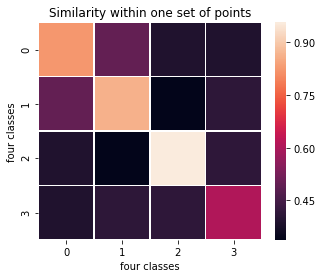

In [0]:
import numpy as np
# here I manually copy the similarities within a set of points from outputs above
a = np.array([[0.8249462954135586, 0.495320191366748, 0.3904001396070319, 0.3905526472362966], \
[0.495320191366748, 0.8644954489562096,  0.33813865010752275, 0.4126735560063434],\
[0.3904001396070319,  0.33813865010752275, 0.9566878574997142, 0.415332851992269],\
[0.3905526472362966, 0.4126735560063434,  0.415332851992269, 0.6080190860395895]])

# import matplotlib.pyplot as plt
# import numpy as np

# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(5,4))
ax = sns.heatmap(a, linewidth=0.5)
plt.title('Similarity within one set of points')
plt.xlabel('four classes')
plt.ylabel('four classes')
plt.show()



In [0]:
with open('data_part1/my_dataset/my_dataset.NumberUtils.c2v.vectors','r') as ff:     # NumberUtils
  testFail = ff.read().split('\n')
with open('data_part1/my_dataset/my_dataset.StrSubstitutor.c2v.vectors','r') as fp:  # StrSubstitutor
  testPass0 = fp.read().split('\n')
with open('data_part2/my_dataset/my_dataset.test.c2v.vectors','r') as ff: # SerializationUtils
  testPass1 = ff.read().split('\n')
with open('data_part2/my_dataset/my_dataset.val.c2v.vectors','r') as fp:  # ToStringBuilder
  testPass2 = fp.read().split('\n')

In [0]:
# remove '' and non-test methods
testFail.pop(-5), testFail.pop(-1), testPass0.pop(8), testPass0.pop(-1), testPass1.pop(-1), testPass2.pop(-1) , testPass2.pop(-2) 

In [0]:
# have removed '' and non-test methods
flist = []
for i in testFail:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  flist.append(list2)

plist0 = []
for i in testPass0:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist0.append(list2)

plist1 = []
for i in testPass1:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist1.append(list2)

plist2 = []
for i in testPass2:
  list2 = []
  for j in i.split():
    list2.append(float(j))
  plist2.append(list2)


import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

dist_outf = 1-pairwise_distances(flist, metric="cosine")
print(dist_outf.sum()/len(flist)**2)   # similarity
print(dist_outf.sum(axis=0)/len(flist))  # similarity for each test case
print(sorted(dist_outf.sum(axis=0)/len(flist)))
print('\n')

dist_out0 = 1-pairwise_distances(plist0, metric="cosine")
print(dist_out0.sum()/len(plist0)**2)
print(dist_out0.sum(axis=0)/len(plist0))  # similarity for each test case
print(sorted(dist_out0.sum(axis=0)/len(plist0)))
print('\n')

dist_out1 = 1-pairwise_distances(plist1, metric="cosine")
print(dist_out1.sum()/len(plist1)**2)
print(dist_out1.sum(axis=0)/len(plist1))  # similarity for each test case
print(sorted(dist_out1.sum(axis=0)/len(plist1)))
print('\n')

dist_out2 = 1-pairwise_distances(plist2, metric="cosine")
print(dist_out2.sum()/len(plist2)**2)
print(dist_out2.sum(axis=0)/len(plist2))  # similarity for each test case
print(sorted(dist_out2.sum(axis=0)/len(plist2)))


0.8611689747144994
[0.91143668 0.89767285 0.89767737 0.91753807 0.89809795 0.89853258
 0.92075861 0.8977414  0.89785753 0.91742952 0.89776164 0.89784553
 0.91561222 0.89776088 0.89786259 0.91625596 0.91057947 0.90789769
 0.90332238 0.90804058 0.91637651 0.91414368 0.91239768 0.9110098
 0.90866012 0.90977409 0.91374345 0.91393471 0.33887513 0.50449775
 0.91233001 0.76336847 0.45691144 0.86582606 0.8913837 ]
[0.33887512646969536, 0.45691144161559144, 0.5044977549492135, 0.7633684741702454, 0.8658260577610588, 0.8913836966801103, 0.8976728540248792, 0.8976773658979228, 0.8977414037998082, 0.8977608845951333, 0.8977616378378462, 0.8978455252444884, 0.8978575276472209, 0.8978625932791882, 0.8980979479570339, 0.8985325833581848, 0.9033223832374602, 0.9078976886941365, 0.9080405799768085, 0.9086601160669643, 0.9097740899906818, 0.9105794695342938, 0.9110098049649971, 0.9114366831487047, 0.9123300061513785, 0.91239768206972, 0.9137434533074253, 0.9139347090264138, 0.9141436800272033, 0.9156122

In [0]:
# similarity within one class without the trigger test case
dist_outf = 1-pairwise_distances(flist[1:], metric="cosine")
print(dist_outf.sum()/len(flist[1:])**2)   # similarity
# smaller than 0.8611689747144994

0.8582451783779


In [0]:
len(flist),len(plist0),len(plist1),len(plist2)

(35, 19, 12, 45)

In [0]:
alllist = flist+plist0+plist1+plist2


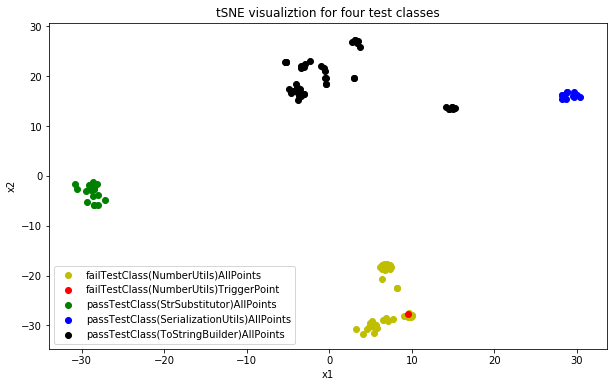

In [0]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=10, metric='cosine',random_state=42).fit_transform(alllist)

Y0_embedded = X_embedded[35:54]
Y1_embedded = X_embedded[54:66]
Y2_embedded = X_embedded[66:]
X_embedded = X_embedded[0:35]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[1:,0],X_embedded[1:,1],c='y')
plt.scatter(X_embedded[0,0],X_embedded[0,1],c='r')


plt.scatter(Y0_embedded[:,0],Y0_embedded[:,1],c='g')

plt.scatter(Y1_embedded[:,0],Y1_embedded[:,1],c='b')

plt.scatter(Y2_embedded[:,0],Y2_embedded[:,1],c='k')

plt.title('tSNE visualiztion for four test classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['failTestClass(NumberUtils)AllPoints', 'failTestClass(NumberUtils)TriggerPoint', 'passTestClass(StrSubstitutor)AllPoints', 'passTestClass(SerializationUtils)AllPoints','passTestClass(ToStringBuilder)AllPoints'])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(alllist)
len(principalComponents)

111

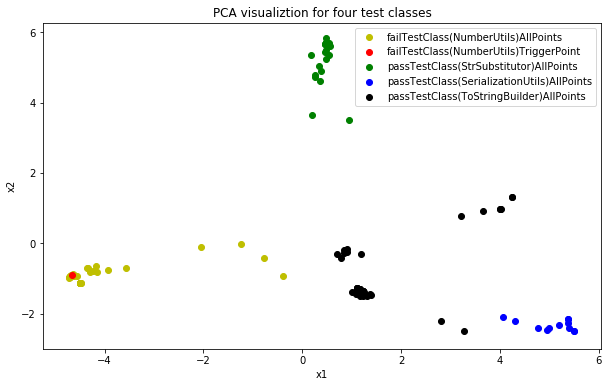

In [0]:
Y0_embedded = principalComponents[35:54]
Y1_embedded = principalComponents[54:66]
Y2_embedded = principalComponents[66:]
X_embedded = principalComponents[0:35]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[1:,0],X_embedded[1:,1],c='y')
plt.scatter(X_embedded[0,0],X_embedded[0,1],c='r')


plt.scatter(Y0_embedded[:,0],Y0_embedded[:,1],c='g')

plt.scatter(Y1_embedded[:,0],Y1_embedded[:,1],c='b')

plt.scatter(Y2_embedded[:,0],Y2_embedded[:,1],c='k')

plt.title('PCA visualiztion for four test classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['failTestClass(NumberUtils)AllPoints', 'failTestClass(NumberUtils)TriggerPoint', 'passTestClass(StrSubstitutor)AllPoints', 'passTestClass(SerializationUtils)AllPoints','passTestClass(ToStringBuilder)AllPoints'])